# Group Project: Arxiv Classifier
Authors: Amir Yunus, Brandon Gay, Lee Oon Teng

In [1]:
from utils import load_data, split_data

# 16 - $M_{10}$: Hyperparameter Search for Shallow Artificial Neural Network with Balanced Dataset


In [3]:
import pickle

m1_model = pickle.load(open('../models/m1_shallow_ann.bin', 'rb'))

/opt/conda/envs/test/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


## 16.1 - Load the Data

In [4]:
filename = 'arxiv_balanced'
df = load_data(f'../data/03_{filename}_engineered.bin')
df.shape

,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,...,title_sentiment,summary_sentiment,comment_sentiment,authors_sentiment,title_ari,summary_ari,comment_ari,authors_ari,category,split
0,0.123139,-0.640712,-1.574598,-0.349324,1.554452,0.257321,-0.134364,0.532439,0.022286,0.283622,...,0.500000,0.487771,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,train
1,0.496790,-0.332664,-1.346791,-0.259469,1.604662,2.067198,-0.156723,-0.166762,-0.152192,0.226985,...,0.500000,0.510417,0.444444,0.5,1.0,0.0,1.0,1.000000,physics,test
2,-0.215609,-0.162737,-1.744773,-0.508142,1.321052,0.256858,0.434013,0.475834,0.816361,0.728514,...,0.500000,0.513417,0.444444,0.5,1.0,0.0,1.0,0.483682,physics,train
3,-0.278125,-0.259886,-1.070402,-0.238034,1.706070,-0.191284,-0.018130,0.215169,0.814408,0.640494,...,0.583333,0.546528,0.444444,0.5,1.0,0.0,1.0,0.860251,physics,val
4,0.353029,-0.179243,-1.015163,0.004783,1.553551,1.306716,-0.129526,0.524395,0.557375,0.121383,...,0.500000,0.554500,0.444444,0.5,1.0,0.0,1.0,0.651046,physics,train


(40586, 4182)

## 16.2 - Split the Data

In [5]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, balance_data = True)

Train set: 13264 samples
Validation set: 5768 samples
Test set: 2120 samples

Samples per category after balancing:

Train set:
category
physics                                       1658
computer science                              1658
mathematics                                   1658
quantitative biology                          1658
quantitative finance                          1658
electrical engineering and systems science    1658
economics                                     1658
statistics                                    1658
Name: count, dtype: int64

Validation set:
category
physics                                       721
computer science                              721
mathematics                                   721
quantitative biology                          721
quantitative finance                          721
electrical engineering and systems science    721
economics                                     721
statistics                                    721
Nam

## 16.6 - Evaluate with Balanced Dataset


Classification Report:
                                            precision    recall  f1-score   support

                          computer science       0.32      0.47      0.38       265
                                 economics       0.50      0.01      0.02       265
electrical engineering and systems science       0.53      0.44      0.48       265
                               mathematics       0.60      0.71      0.65       265
                                   physics       0.55      0.94      0.70       265
                      quantitative biology       0.52      0.63      0.57       265
                      quantitative finance       0.63      0.50      0.56       265
                                statistics       0.45      0.36      0.40       265

                                  accuracy                           0.51      2120
                                 macro avg       0.51      0.51      0.47      2120
                              weighted avg       0

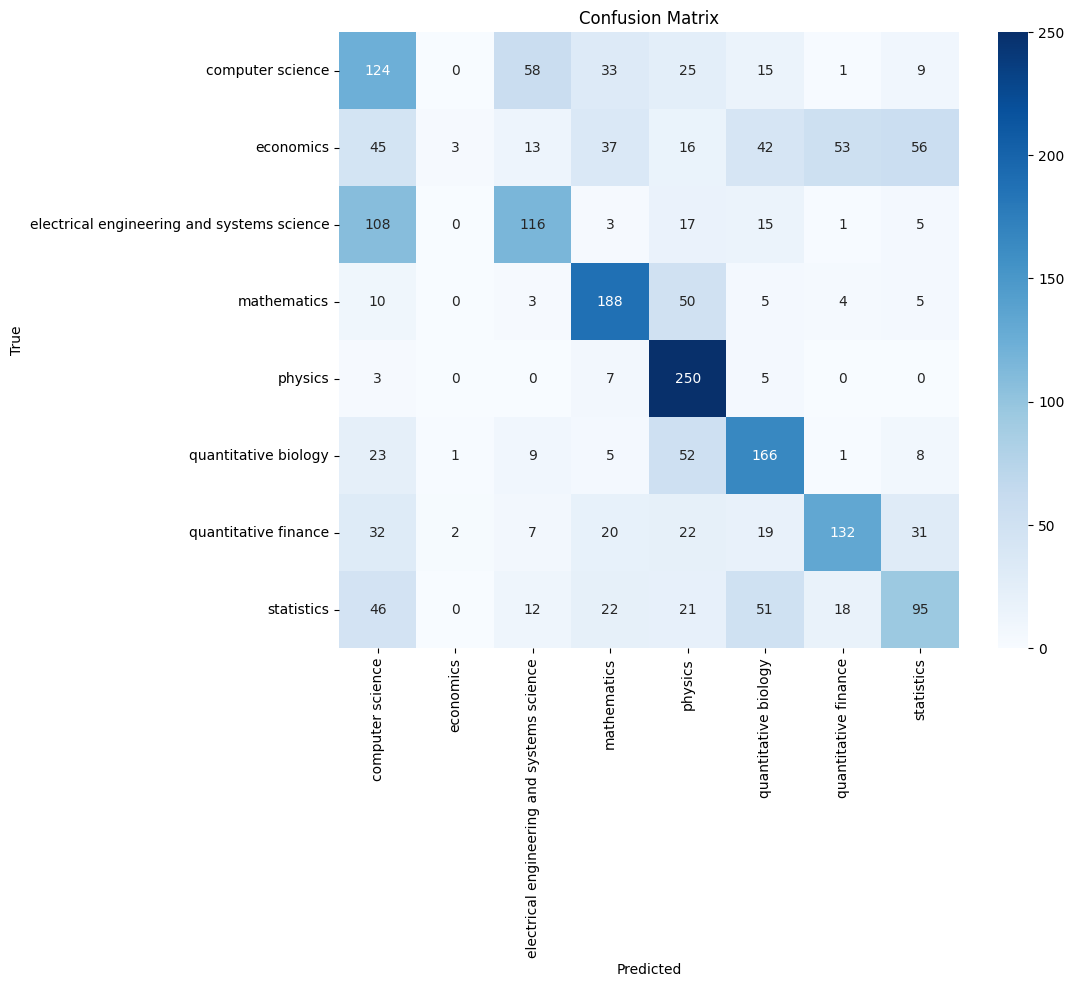

In [7]:
m1_model.predict(X_test, y_test)